In [1]:
# Required: Import packages
import json
import pandas as pd
from PIL import Image
import numpy as np

# 0. Load and Clean Data

In [2]:
# Required: Load labels json file containing image object labels

with open('../Data/bdd100k/labels/bdd100k_labels_images_train.json') as json_file:
    train_data = json.load(json_file)

with open('../Data/bdd100k/labels/bdd100k_labels_images_val.json') as json_file:
    test_data = json.load(json_file)

In [3]:
# Required: Normalize semi-structured JSON data into a pd dataframe
data_normalized = pd.json_normalize(train_data)
test_data_normalized = pd.json_normalize(test_data)
type(data_normalized)

pandas.core.frame.DataFrame

In [4]:
# Optional - Testing only -- check number of images 
data_normalized.shape

(69863, 6)

In [5]:
# Optional - Testing only -- check format and contents of df
data_normalized.head()

,name,timestamp,labels,attributes.weather,attributes.scene,attributes.timeofday
0,0000f77c-6257be58.jpg,10000,"[{'category': 'traffic light', 'attributes': {...",clear,city street,daytime
1,0000f77c-62c2a288.jpg,10000,"[{'category': 'traffic sign', 'attributes': {'...",clear,highway,dawn/dusk
2,0000f77c-cb820c98.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,residential,dawn/dusk
3,0001542f-5ce3cf52.jpg,10000,"[{'category': 'traffic sign', 'attributes': {'...",clear,city street,night
4,0001542f-7c670be8.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,night


In [6]:
# Optional - Testing only -- check the df values corresponding to a specific image file name
data_normalized[data_normalized['name'] == '0a0a0b1a-7c39d841.jpg']


,name,timestamp,labels,attributes.weather,attributes.scene,attributes.timeofday
3915,0a0a0b1a-7c39d841.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,daytime


In [7]:
# Optional - Testing only -- check what format the "labels" contains
type(data_normalized[data_normalized['name'] == '0a0a0b1a-7c39d841.jpg'].labels)
data_normalized.iloc[3915].labels

[{'category': 'car',
  'attributes': {'occluded': True,
   'truncated': False,
   'trafficLightColor': 'none'},
  'manualShape': True,
  'manualAttributes': True,
  'box2d': {'x1': 555.647397,
   'y1': 304.228432,
   'x2': 574.015906,
   'y2': 316.474104},
  'id': 109344},
 {'category': 'car',
  'attributes': {'occluded': True,
   'truncated': False,
   'trafficLightColor': 'none'},
  'manualShape': True,
  'manualAttributes': True,
  'box2d': {'x1': 554.116689,
   'y1': 318.004813,
   'x2': 567.89307,
   'y2': 328.719775},
  'id': 109345},
 {'category': 'car',
  'attributes': {'occluded': True,
   'truncated': False,
   'trafficLightColor': 'none'},
  'manualShape': True,
  'manualAttributes': True,
  'box2d': {'x1': 523.502507,
   'y1': 311.881977,
   'x2': 544.932435,
   'y2': 327.189068},
  'id': 109346},
 {'category': 'car',
  'attributes': {'occluded': True,
   'truncated': False,
   'trafficLightColor': 'none'},
  'manualShape': True,
  'manualAttributes': True,
  'box2d': {'x1'

In [8]:
# Check size of test and validation data for conditions clear, highway, and daytime.
train_shape = data_normalized[(data_normalized['attributes.weather'] == "clear") & 
               (data_normalized['attributes.scene'] == "highway") & 
               (data_normalized['attributes.timeofday'] == "daytime")].shape

test_shape = test_data_normalized[(test_data_normalized['attributes.weather'] == "clear") & 
               (test_data_normalized['attributes.scene'] == "highway") & 
               (test_data_normalized['attributes.timeofday'] == "daytime")].shape

In [9]:
# Print out number of images in train and test datasets

print("Train Data: We get a total of %d images taken during clear weather, highway, and daytime." %train_shape[0])
print("Test Data: We get a total of %d images taken during clear weather, highway, and daytime." %test_shape[0])
print("Test data composes of %.2f%% of total dataset" %(100*test_shape[0]/(test_shape[0]+train_shape[0])))

Train Data: We get a total of 3575 images taken during clear weather, highway, and daytime.
Test Data: We get a total of 514 images taken during clear weather, highway, and daytime.
Test data composes of 12.57% of total dataset


# 1. Determine number of objects in the image

In [10]:
# REQUIRED: Function used to clean data, extract labels, and extract data for sunny, 
# highway, and daytime conditions

def clean_data(data_normalized):
    # Initialize lists of object types. Each list will contain 69863 values, each of which corresponds to an image specified as a row in data_cleaned 
    num_objects = []
    num_road = []
    num_sidewalk = []
    num_building = []
    num_wall = []
    num_fence = []
    num_pole = []
    num_traffic_light = []
    num_traffic_sign = []
    num_vegetation = []
    num_terrain = []
    num_sky = []
    num_person = []
    num_rider = []
    num_car = []
    num_truck = []
    num_bus = []
    num_train = []
    num_motorcycle = []
    num_bicycle = []
    num_lanes = []
    num_drivable_area = []

    # Iterate through each image in data_normalized, sum up the number of objects corresponding to each object type, and append to
    # the corresponding object list
    for index, row in data_normalized.iterrows():
        num_objects.append(len(row['labels']))
        num_road.append(sum(x['category'] == 'road' for x in row['labels']))
        num_sidewalk.append(sum(x['category'] == 'sidewalk' for x in row['labels']))
        num_building.append(sum(x['category'] == 'building' for x in row['labels']))
        num_wall.append(sum(x['category'] == 'wall' for x in row['labels']))
        num_fence.append(sum(x['category'] == 'fence' for x in row['labels']))
        num_pole.append(sum(x['category'] == 'pole' for x in row['labels']))
        num_traffic_light.append(sum(x['category'] == 'traffic light' for x in row['labels']))
        num_traffic_sign.append(sum(x['category'] == 'traffic sign' for x in row['labels']))
        num_vegetation.append(sum(x['category'] == 'vegetation' for x in row['labels']))
        num_terrain.append(sum(x['category'] == 'terrain' for x in row['labels']))
        num_sky.append(sum(x['category'] == 'sky' for x in row['labels']))
        num_person.append(sum(x['category'] == 'person' for x in row['labels']))
        num_rider.append(sum(x['category'] == 'rider' for x in row['labels']))
        num_car.append(sum(x['category'] == 'car' for x in row['labels']))
        num_truck.append(sum(x['category'] == 'truck' for x in row['labels']))
        num_bus.append(sum(x['category'] == 'bus' for x in row['labels']))
        num_train.append(sum(x['category'] == 'train' for x in row['labels']))
        num_motorcycle.append(sum(x['category'] == 'motorcycle' for x in row['labels']))
        num_bicycle.append(sum(x['category'] == 'bicycle' for x in row['labels']))
        num_lanes.append(sum(x['category'] == 'lane' for x in row['labels']))
        num_drivable_area.append(sum(x['category'] == 'drivable area' for x in row['labels']))

    data_normalized['num_objects'] = num_objects
    data_normalized['num_sidewalk'] = num_sidewalk
    data_normalized['num_building'] = num_building
    data_normalized['num_wall'] = num_wall
    data_normalized['num_fence'] = num_fence
    data_normalized['num_pole'] = num_pole
    data_normalized['num_traffic_light'] = num_traffic_light
    data_normalized['num_traffic_sign'] = num_traffic_sign
    data_normalized['num_vegetation'] = num_vegetation
    data_normalized['num_terrain'] = num_terrain
    data_normalized['num_sky'] = num_sky
    data_normalized['num_person'] = num_person
    data_normalized['num_rider'] = num_rider
    data_normalized['num_car'] = num_car
    data_normalized['num_truck'] = num_truck
    data_normalized['num_bus'] = num_bus
    data_normalized['num_train'] = num_train
    data_normalized['num_motorcycle'] = num_motorcycle
    data_normalized['num_bicycle'] = num_bicycle
    data_normalized['num_lanes'] = num_lanes
    data_normalized['num_drivable_area'] = num_drivable_area

    # Filter only for images where weather == "clear", scene == "highway", and timeofday == "daytime". 
    # Note: A better implementation may be to filter the dataframe prior to counting the objects per image, 
    # but it may be useful to keep the data_normalized and object counts for each image in case we want to use different filtering values.

    data_cleaned = data_normalized[(data_normalized['attributes.weather'] == "clear") & 
                   (data_normalized['attributes.scene'] == "highway") & 
                   (data_normalized['attributes.timeofday'] == "daytime")]
    return data_cleaned

In [11]:
# Required: Filter only for images where weather == "clear", scene == "highway", and timeofday == "daytime". 
# Note: A better implementation may be to filter the dataframe prior to counting the objects per image, 
# but it may be useful to keep the data_normalized and object counts for each image in case we want to use different filtering values.

# Clean Training & Validation Data
training_data_cleaned = clean_data(data_normalized)
training_data_cleaned

,name,timestamp,labels,attributes.weather,attributes.scene,attributes.timeofday,num_objects,num_sidewalk,num_building,num_wall,...,num_person,num_rider,num_car,num_truck,num_bus,num_train,num_motorcycle,num_bicycle,num_lanes,num_drivable_area
10,00067cfb-caba8a02.jpg,10000,"[{'category': 'traffic light', 'attributes': {...",clear,highway,daytime,29,0,0,0,...,0,0,3,0,1,0,0,0,11,3
62,002d290d-89f4e5c0.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,daytime,23,0,0,0,...,0,0,6,0,0,1,0,0,10,2
88,003baca5-aab2e274.jpg,10000,"[{'category': 'traffic sign', 'attributes': {'...",clear,highway,daytime,6,0,0,0,...,0,0,2,0,0,0,0,0,1,1
89,003baca5-ad660439.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,daytime,15,0,0,0,...,0,0,10,1,0,0,0,0,2,1
92,003e23ee-07d32feb.jpg,10000,"[{'category': 'traffic sign', 'attributes': {'...",clear,highway,daytime,28,0,0,0,...,0,0,6,1,1,0,0,0,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69675,b18cb922-e3af77af.jpg,10000,"[{'category': 'traffic sign', 'attributes': {'...",clear,highway,daytime,18,0,0,0,...,0,0,5,0,0,0,0,0,9,2
69805,fde2db45-f6e2fbd1.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,daytime,11,0,0,0,...,0,0,4,0,0,0,0,0,6,1
69809,fde816b0-1b0f1a85.jpg,10000,"[{'category': 'traffic sign', 'attributes': {'...",clear,highway,daytime,29,0,0,0,...,0,0,8,0,0,0,0,0,9,2
69812,fdebe7ab-8409a734.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,daytime,40,0,0,0,...,0,0,12,0,0,0,0,0,8,2


# 1.5 Testing

In [12]:
# Clean Test Data
test_data_cleaned = clean_data(test_data_normalized)
test_data_cleaned

,name,timestamp,labels,attributes.weather,attributes.scene,attributes.timeofday,num_objects,num_sidewalk,num_building,num_wall,...,num_person,num_rider,num_car,num_truck,num_bus,num_train,num_motorcycle,num_bicycle,num_lanes,num_drivable_area
13,b1cebfb7-284f5117.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,daytime,21,0,0,0,...,0,0,11,3,0,0,0,0,6,1
40,b1d7b3ac-5af8623b.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,daytime,20,0,0,0,...,0,0,8,0,1,0,0,0,2,1
55,b1df722f-57d21f3f.jpg,10000,"[{'category': 'traffic sign', 'attributes': {'...",clear,highway,daytime,25,0,0,0,...,0,0,8,3,0,0,0,0,9,4
56,b1df722f-5bcc3db7.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,daytime,38,0,0,0,...,0,4,12,1,0,0,0,0,9,5
67,b1e8ad72-c3c79240.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,daytime,30,0,0,0,...,0,0,7,0,0,0,0,0,13,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9787,c9e7c9d4-18d31194.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,daytime,34,0,0,0,...,0,0,19,2,0,0,0,0,9,4
9838,ca077fe9-d2cf4446.jpg,10000,"[{'category': 'traffic sign', 'attributes': {'...",clear,highway,daytime,19,0,0,0,...,0,0,3,0,0,0,0,0,6,2
9858,ca146661-7f70d0c4.jpg,10000,"[{'category': 'traffic sign', 'attributes': {'...",clear,highway,daytime,37,0,0,0,...,0,0,18,0,0,0,0,0,9,3
9897,ca2bcf0e-69e964d2.jpg,10000,"[{'category': 'traffic sign', 'attributes': {'...",clear,highway,daytime,29,0,0,0,...,0,0,13,0,0,0,0,0,7,3


In [13]:
# Split training dataset to training and validation

training_data_split = training_data_cleaned.sample(frac = 0.9)
val_data_split = training_data_cleaned.drop(training_data_split.index)
val_data_split

,name,timestamp,labels,attributes.weather,attributes.scene,attributes.timeofday,num_objects,num_sidewalk,num_building,num_wall,...,num_person,num_rider,num_car,num_truck,num_bus,num_train,num_motorcycle,num_bicycle,num_lanes,num_drivable_area
263,00a820ef-d655700e.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,daytime,36,0,0,0,...,0,0,23,0,0,0,0,0,10,3
404,01118704-2d838d7f.jpg,10000,"[{'category': 'traffic sign', 'attributes': {'...",clear,highway,daytime,21,0,0,0,...,0,0,3,0,1,0,0,0,7,3
599,01a4075d-544ddc3c.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,daytime,29,0,0,0,...,0,0,17,0,0,0,0,0,9,3
989,02b1ab3d-e93996c2.jpg,10000,"[{'category': 'traffic light', 'attributes': {...",clear,highway,daytime,18,0,0,0,...,0,0,7,0,4,0,0,0,3,1
1067,02ddd956-3bfcf83e.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,daytime,19,0,0,0,...,0,0,4,0,0,0,0,0,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68363,ae75c09b-61da0fbb.jpg,10000,"[{'category': 'traffic sign', 'attributes': {'...",clear,highway,daytime,32,0,0,0,...,0,0,18,0,0,0,0,0,7,4
68534,aedc744b-813fad99.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,daytime,22,0,0,0,...,0,0,8,2,0,0,0,0,7,2
68985,afe7c43b-998729a8.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,daytime,45,0,0,0,...,0,0,20,0,1,0,0,0,12,4
69079,b01e39e0-2c38b336.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,daytime,22,0,0,0,...,0,0,8,2,0,0,0,0,9,3


In [15]:
training_data_split['name']

46679    77427e39-46a015fd.jpg
15586    27a28012-ae2afe4a.jpg
14837    25c73b20-45395ebd.jpg
19940    32b33022-df9404a3.jpg
25739    41a2b4ac-59f6d2d2.jpg
                 ...          
3730     09a1bb0d-8acc7b23.jpg
57081    920c88a6-b6965810.jpg
32879    53f4b361-6ced6aec.jpg
66186    a8f71e05-b135b645.jpg
35903    5b4cc6fb-6275ed86.jpg
Name: name, Length: 3218, dtype: object

In [36]:
# REQUIRED - ONE TIME ONLY - ONLY PERFORM THIS STEP ONCE
# Move training and validation files to a separate folder. 

import os
import shutil

source = '../Data/bdd100k/bdd100k 2/images/100k/train/'
destination = '../Data/bdd100k/bdd100k 2/images/100k/train_clean/'

for f in training_data_split['name']:
    origin = source + f
    dest = destination + f
    shutil.move(origin, dest)


In [37]:
# REQUIRED - ONE TIME ONLY - ONLY PERFORM THIS STEP ONCE
# Move cleaned validation dataset to new folder

source = '../Data/bdd100k/bdd100k 2/images/100k/train/'
destination = '../Data/bdd100k/bdd100k 2/images/100k/val_clean/'

for f in val_data_split['name']:
    origin = source + f
    dest = destination + f
    shutil.move(origin, dest)

In [38]:
# REQUIRED - ONE TIME ONLY - ONLY PERFORM THIS STEP ONCE
# Move cleaned test dataset to new folder

source = '../Data/bdd100k/bdd100k 2/images/100k/val/'
destination = '../Data/bdd100k/bdd100k 2/images/100k/test_clean/'

for f in test_data_cleaned['name']:
    origin = source + f
    dest = destination + f
    shutil.move(origin, dest)
    

In [39]:
# REQUIRED - ONE TIME ONLY - ONLY PERFORM THIS STEP ONCE
# Move masks training files to a separate folder. 

source = '../Data/bdd100k/bdd100k 3/labels/drivable/masks/train/'
destination = '../Data/bdd100k/bdd100k 3/labels/drivable/masks/train_clean/'

for f in training_data_split['name']:
    origin = source + f[:-3] + 'png'
    dest = destination + f[:-3] + 'png'
    shutil.move(origin, dest)

In [41]:
# REQUIRED - ONE TIME ONLY - ONLY PERFORM THIS STEP ONCE
# Move masks validation files to a separate folder. 

source = '../Data/bdd100k/bdd100k 3/labels/drivable/masks/train/'
destination = '../Data/bdd100k/bdd100k 3/labels/drivable/masks/val_clean/'

for f in val_data_split['name']:
    origin = source + f[:-3] + 'png'
    dest = destination + f[:-3] + 'png'
    shutil.move(origin, dest)

In [42]:
# REQUIRED - ONE TIME ONLY - ONLY PERFORM THIS STEP ONCE
# Move masks test files to a separate folder. 

source = '../Data/bdd100k/bdd100k 3/labels/drivable/masks/val/'
destination = '../Data/bdd100k/bdd100k 3/labels/drivable/masks/test_clean/'

for f in test_data_cleaned['name']:
    origin = source + f[:-3] + 'png'
    dest = destination + f[:-3] + 'png'
    shutil.move(origin, dest)

# 2. Image ingestion and preprocessing

In [16]:
# create function to upload image as np arrays
import cv2
from PIL import Image

def image_upload(h, d, ch, image_folder_path, mask_folder_path, image_path):
    
    X = np.empty(shape = (len(image_path), h, d, ch), dtype = 'float32')
    y = np.empty(shape = (len(image_path), h, d, ch), dtype = 'float32')
    defaults = (('<pad>', 0), 'O')
    i = 0
    
    for f in image_path:
        
        f_temp = f
        f_temp = f_temp[:-4]
        f_png = (f_temp + '.png')
        
#         mask_png = (image_folder_path+f)
#         mask_jpg = mask_png[:-4]
#         mask_jpg = (mask_jpg + '.jpg')
        
        image = cv2.imread(image_folder_path+f, cv2.IMREAD_COLOR)
        mask = cv2.imread(mask_folder_path+f_png, cv2.IMREAD_COLOR)
        
        X[i] = image
        y[i] = mask
        i+=1
    

#     image_data = cv2.resize(X[j], (128,128))
#     mask_data = cv2.resize(y[j], (128,128)) 
    
#     image_data = image_data[np.newaxis,:,:,:]
#     mask_data = mask_data[np.newaxis,:,:,:]    
        
        
       # tmp = resize(X_train[i], (150,150))
        
    return X, y

# create function to resize image

def image_resize(X, y):
    
    image_data = np.empty(shape = (len(X), 128, 128, 3), dtype = 'float32')
    mask_data = np.empty(shape = (len(y), 128, 128, 3), dtype = 'float32')
    
    for i in range(len(image_data)):
        image = cv2.resize(X[i], (128,128))
        mask = cv2.resize(y[i], (128,128))
    
        image_data[i] = image 
        mask_data[i] = mask 

    return image_data, mask_data

In [26]:
# importing the training data

train_data, train_mask = image_upload(h = 720, d = 1280, ch = 3, 
             image_folder_path = "../Data/bdd100k/bdd100k 2/images/100k/train_clean/", 
             mask_folder_path = "../Data/bdd100k/bdd100k 3/labels/drivable/masks/train_clean/", 
             image_path = training_data_split['name'])
# resize the training data
train_data, train_mask = image_resize(train_data, train_mask)

In [25]:
# importing the val data
val_data, val_mask = image_upload(h = 720, d = 1280, ch = 3, 
             image_folder_path = "../Data/bdd100k/bdd100k 2/images/100k/val_clean/", 
             mask_folder_path = "../Data/bdd100k/bdd100k 3/labels/drivable/masks/val_clean/", 
             image_path = val_data_split['name'])
# resize the val data
val_data, val_mask = image_resize(val_data, val_mask)

In [26]:
# importing the testing data
test_data, test_mask = image_upload(h = 720, d = 1280, ch = 3, 
             image_folder_path = "../Data/bdd100k/bdd100k 2/images/100k/test_clean/", 
             mask_folder_path = "../Data/bdd100k/bdd100k 3/labels/drivable/masks/test_clean/", 
             image_path = test_data_cleaned['name'])
# resize the testing data
test_data, test_mask = image_resize(test_data, test_mask)

In [27]:
test_data.shape

(514, 128, 128, 3)

In [40]:
train_mask_nan_removed = train_mask
train_mask_nan_removed = train_mask_nan_removed[~np.isnan(train_mask_nan_removed)]

train_data_nan_removed = train_data
train_data_nan_removed = train_data_nan_removed[~np.isnan(train_data_nan_removed)]

In [45]:
train_mask.shape

(3218, 128, 128, 3)

In [49]:
print("Unique image data:", np.unique(train_data))

Unique image data: [0.      0.03125 0.0625  ...     nan     nan     nan]


In [ ]:
print("Unique image data:", np.unique(train_mask_nan_removed))

# 3. FCN

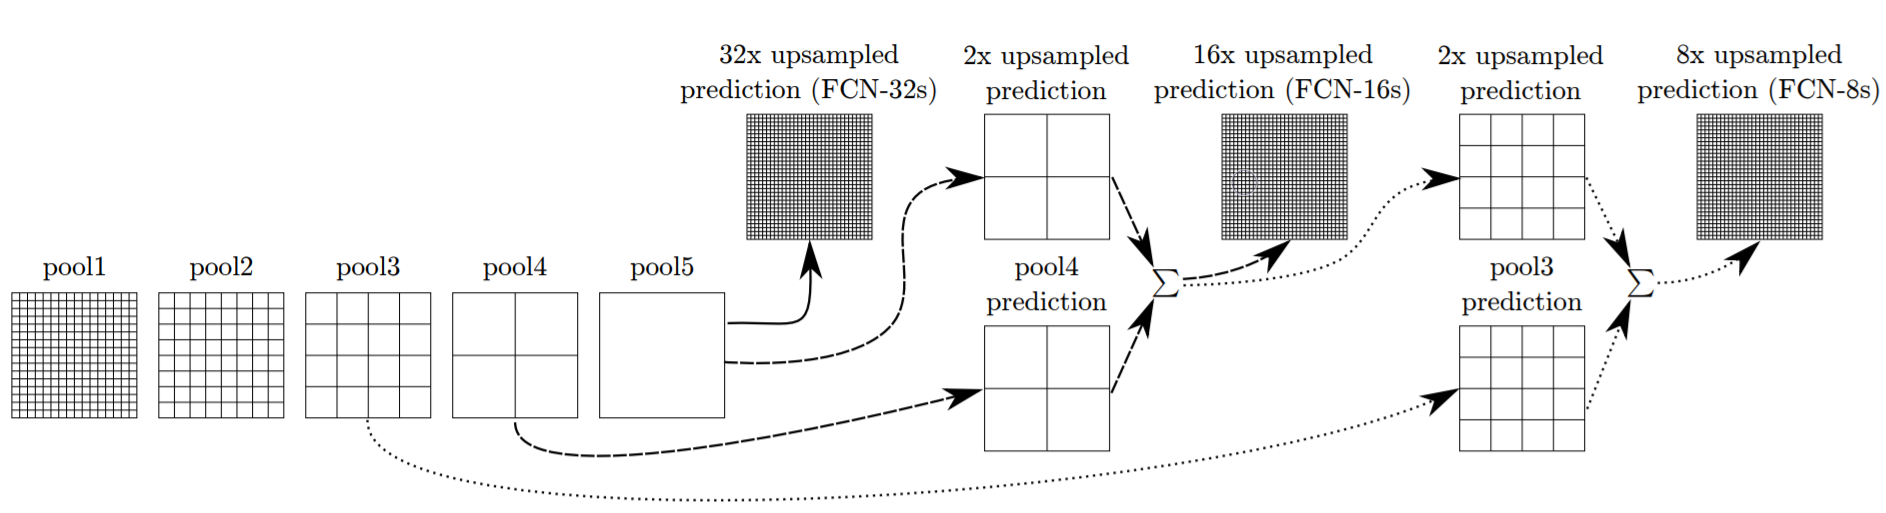

In [43]:
from IPython import display
display.Image('https://mohitjainweb.files.wordpress.com/2018/09/fcn-skip-connections1.png')

In [21]:
# import packages
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
# using the pre-trained vgg16 algorithm
from tensorflow.keras.applications.vgg16 import *

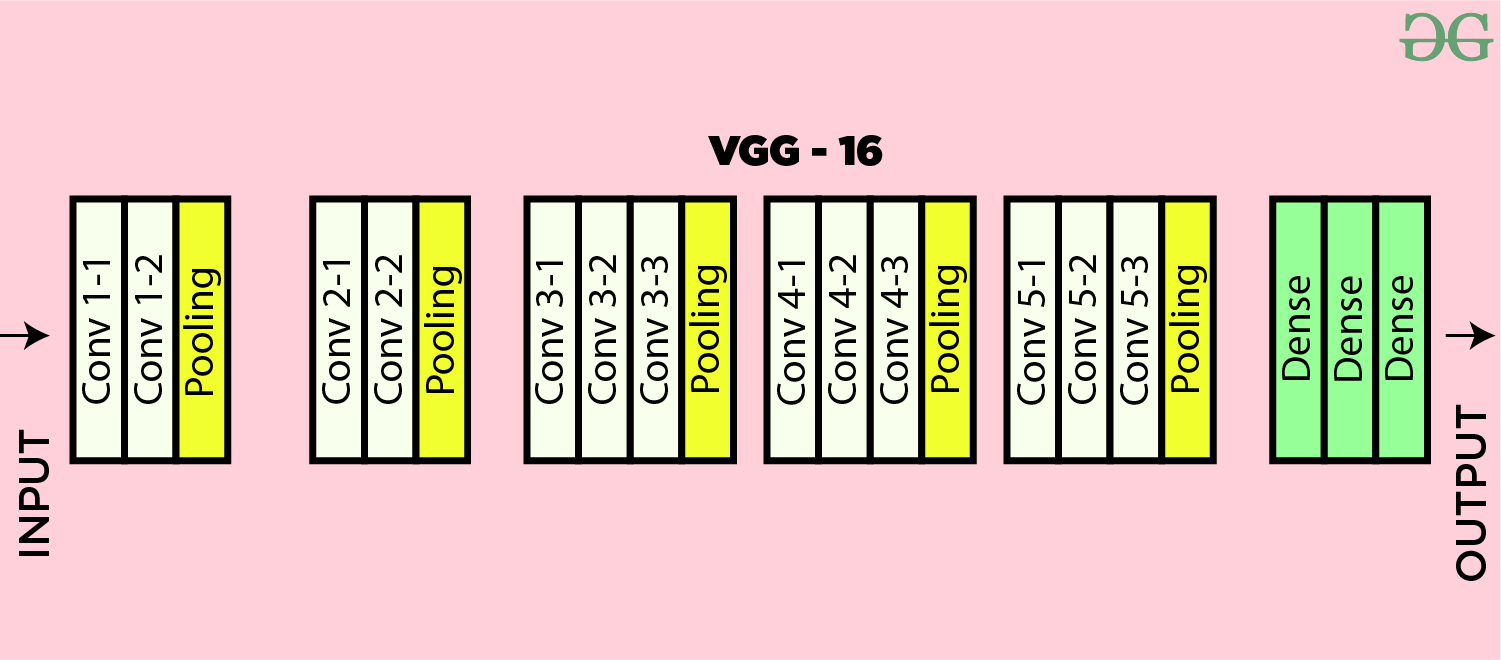

In [45]:
# vgg16 architecture
display.Image('https://media.geeksforgeeks.org/wp-content/uploads/20200219152327/conv-layers-vgg16.jpg')
# documentation: https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16

In [22]:
def fcn(image_size = 128, ch_in=3, ch_out=3):
    
    #initiating an keras tensor
#     inputs = Input(shape=(*image_size, ch_in), name='input')
    inputs = Input((image_size, image_size, ch_in))
    # calling the pre-trained vgg-16 model
    vgg16 = VGG16(
        include_top=False, # not including the 3 dense layers
        weights='imagenet', # applying weights from pre-trained imagenet networks
        input_tensor=inputs, # keras tensor as model input
        input_shape= (128,128,3))

    # extracting the outputs of pool3, pool4, pool5
    f3 = vgg16.get_layer('block3_pool').output  
    f4 = vgg16.get_layer('block4_pool').output  
    f5 = vgg16.get_layer('block5_pool').output  
    
    # creating the rest of the convlution and pooling layers
    f6 = Conv2D(filters=4086, kernel_size=7, padding='same',
                      activation='relu')(f5)
    f6_drop = Dropout(0.5)(f6) # add dropout layer to reduce overfitting, parameters can be fine-tuned
    f7 = Conv2D(filters=4086, kernel_size=1, padding='same',
                      activation='relu')(f6_drop)
    f7_drop = Dropout(0.5)(f7)
    f8 = Conv2D(filters=ch_out, kernel_size=1, padding='same',
                      activation=None)(f7_drop)

    # merging the layers
    # transposing pool5 to be merged with prediction from pool4
    f5_transpose = Conv2DTranspose(filters=ch_out, kernel_size=4, strides=2,
                                use_bias=False, padding='same', activation='relu')(f5)
    # convolution of pool4
    f4_conv = Conv2D(filters=ch_out, kernel_size=1, padding='same',
                      activation=None)(f4)
    # Merging the 2 feature maps:
    merge_1 = add([f4_conv, f5_transpose])

    # transposing output from merge_1 to be merged with prediction from pool3
    merge_1_transpose = Conv2DTranspose(filters=ch_out, kernel_size=4, strides=2,
                                use_bias=False, padding='same', activation='relu')(merge_1)
    # convolution of pool3
    f3_conv = Conv2D(filters=ch_out, kernel_size=1, padding='same',
                      activation=None)(f3)
    # Merging the 2 feature maps:
    merge2 = add([f3_conv, merge_1_transpose])

    # Transpose to decode and up-scale feature map (28x28) to the original shape (224x224)
    # stride = 224 / 28 = 8
    outputs = Conv2DTranspose(filters=ch_out, kernel_size=16, strides=8,
                              padding='same', activation=None)(merge2)
    
    fcn_model = Model(inputs, outputs)
    return fcn_model

In [28]:
# configure model for training - loss function is MSE
import tensorflow as tf
model = fcn(128)
model.compile(optimizer='sgd', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True))

In [47]:
results = model.fit(x = train_data, y = train_mask, 
                    batch_size=4, 
                    epochs=20)

Epoch 1/20


ValueError: in user code:

    /Users/fidelianawar/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /Users/fidelianawar/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/fidelianawar/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/fidelianawar/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/fidelianawar/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/fidelianawar/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /Users/fidelianawar/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /Users/fidelianawar/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /Users/fidelianawar/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:424 call
        return self._run_internal_graph(
    /Users/fidelianawar/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /Users/fidelianawar/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/fidelianawar/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:234 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer block1_conv1 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: (4, 1)


In [38]:
model.evaluate(
    x=val_data,
    y=val_mask,
)

12/12 [==============================] - 8s 586ms/step - loss: nan


nan

# 5. Metrics

In [73]:
#calculate metrics from keras

from keras import backend as K
import keras

##### option 1
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
#history = model.fit(training_data_split, test_data_split, validation_split=0.3, epochs=10, verbose=0)

#evaluate the model
#loss, accuracy, f1_score, precision, recall = model.evaluate(Xtest, ytest, verbose=0)


##### option 2
model.compile(optimizer="sgd",
              loss="binary_crossentropy",
              metrics=[keras.metrics.Precision(), keras.metrics.Recall()])

##### option 3
tf.keras.metrics.Recall(
    thresholds=None, top_k=None, class_id=None, name=None, dtype=None
)

#### option 4 - https://neptune.ai/blog/keras-metrics

# 4. Opening an image file and converting contents to raw pixel values

In [75]:

# with open('../Final_Project/bdd100k/labels/bdd100k_labels_images_train.json') as json_file:

# load the image
with Image.open('../Data/bdd100k/bdd100k 2/images/100k/train/0a0a0b1a-7c39d841.jpg') as image:
    # convert image to numpy array
    image_data = asarray(image)
    
# Print image_data type (np array)
print(type(image_data))

# summarize shape/dimensions (should be height, width, and 
print(image_data.shape)

# Print image data
print(image_data) 

# Convert image data back to a Pillow image
image2 = Image.fromarray(image_data)
print(type(image2))

# summarize image details
print(image2.mode)
print(image2.size)

# Open PIL image 
# image2.show()

FileNotFoundError: [Errno 2] No such file or directory: '../Data/bdd100k/bdd100k 2/images/100k/train/0a0a0b1a-7c39d841.jpg'

In [ ]:
# 